In [10]:
import numpy as np 
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [18]:
c_gravity = 6.67430e-11
mass_sun = 1.989e30
mass_venus = 4.867e24
#kepler law
sma = 1.082e11 #semi major axis
eccentricity = 0.0067


c = sma * eccentricity  
time_in_days = 225
print(f"\nSemi-major axis (a): {sma} m\nEccentricity (e): {eccentricity}")
print(f"Focus Distance (c): {c} m (Sun is located at one focus)\n")


Semi-major axis (a): 108200000000.0 m
Eccentricity (e): 0.0067
Focus Distance (c): 724940000.0 m (Sun is located at one focus)



In [22]:
time_seconds = time_in_days * 24 * 60 * 60 
dt = time_seconds // 1000
venus_p = 1.0748e11 #closet point from the sun
venus_a = 1.0894e11 #farthest point from the sun 

In [24]:
x_position = np.zeros(1000)
y_position = np.zeros(1000)

x_velocity = np.zeros(1000)
y_velocity = np.zeros(1000)

In [26]:
x_position[0] =  venus_p # venus perihelion
y_position[0] = 0
x_velocity[0] = 0
#avg velocity 
y_velocity[0] = np.sqrt(c_gravity * mass_sun * ((1 + eccentricity) / (venus_p)))

print(f"Initial Conditions:\nPosition at perihelion (x, y): ({x_position[0]}, {y_position[0]}) m")
print(f"Velocity at perihelion (vx, vy): ({x_velocity[0]}, {y_velocity[0]}) m/s\n")

Initial Conditions:
Position at perihelion (x, y): (107480000000.0, 0.0) m
Velocity at perihelion (vx, vy): (0.0, 35261.96084174983) m/s



In [28]:
for i in range(999):
    #get the distance
    r = np.sqrt(x_position[i]**2 + y_position[i]**2) # pythagorean theroem did me handy:D

    # get the gravitional force
    x_gravF = -c_gravity * mass_sun * mass_venus * x_position[i] / r**3 
    y_gravF = -c_gravity * mass_sun * mass_venus * y_position[i] / r**3

    #get the accerlation and time stamp
    x_velocity[i + 1] = x_velocity[i] + x_gravF / mass_venus * dt
    y_velocity[i + 1] = y_velocity[i] + y_gravF / mass_venus * dt

    #get the position
    x_position[i + 1] = x_position[i] + x_velocity[i] * dt
    y_position[i + 1] = y_position[i] + y_velocity[i] * dt
    
    





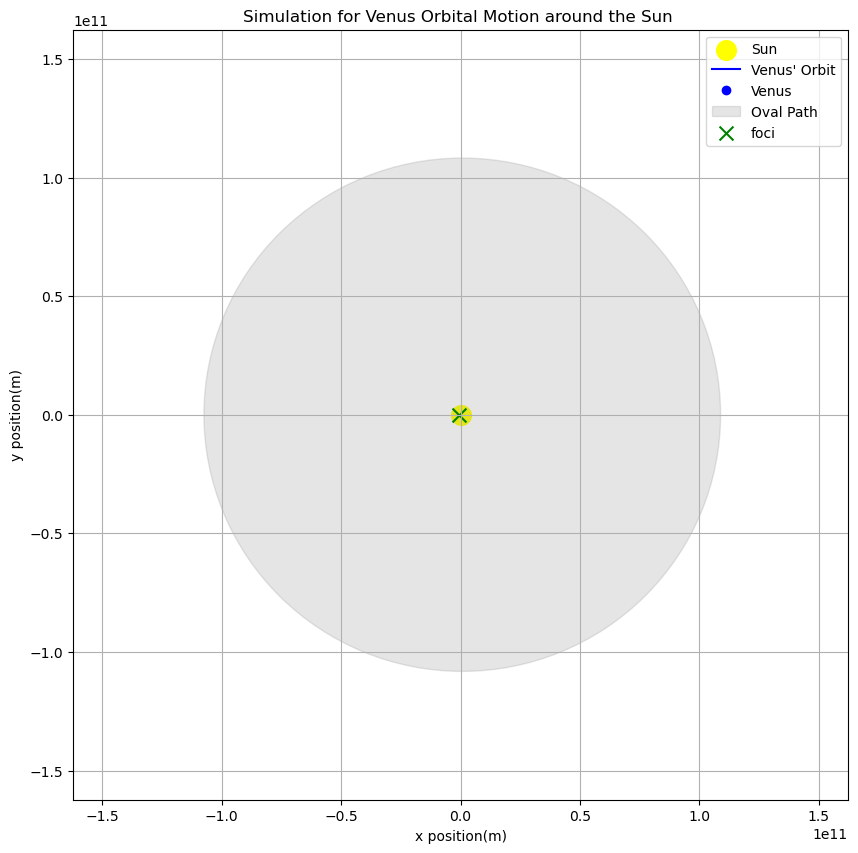

In [30]:
fig, graph_axis = plt.subplots(figsize = (10,10))
graph_axis.set_xlim(-1.5 * sma, 1.5 * sma)
graph_axis.set_ylim(-1.5 * sma, 1.5 * sma)

graph_axis.set_xlabel('x position(m)')
graph_axis.set_ylabel('y position(m)')
graph_axis.set_title("Simulation for Venus Orbital Motion around the Sun ")

graph_axis.scatter(0,0, color='yellow', label='Sun', s=200)
graph_axis.grid(True)
orbit_line, = graph_axis.plot([], [], color='blue', label="Venus' Orbit")
venus_point, = graph_axis.plot([], [], 'bo', label="Venus")
ellipse = plt.Circle((c, 0), sma, color='gray', alpha=0.2, label="Oval Path")
graph_axis.add_patch(ellipse)

graph_axis.scatter(-c, 0, color='green', label="foci", s=100, marker='x')
plt.legend()

In [32]:
def update(frame):
    orbit_line.set_data(x_position[:frame+1], y_position[:frame+1])  
    venus_point.set_data([x_position[frame]], [y_position[frame]])   
    return orbit_line, venus_point


In [34]:
animate = FuncAnimation(fig, update, frames = range(0,1000,10), interval = 50, blit= True)
HTML(animate.to_jshtml())